In [ ]:
from ehr import HealthRecord
import os

import pandas as pd

# Import TSNE
from sklearn.manifold import TSNE

# Spacy imports
import scispacy
import spacy
import en_ner_bc5cdr_md

# Import Elmo
from allennlp.commands.elmo import ElmoEmbedder

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set_style('whitegrid')

In [10]:
# Load required models
scispacy_bc5cdr = en_ner_bc5cdr_md.load()
elmo = ElmoEmbedder()

In [ ]:
DATA_DIR = "data/"

In [ ]:
# Get all the IDs for training data
file_ids = sorted(list(set(['.'.join(fname.split('.')[:-1]) for fname in os.listdir(DATA_DIR)])))

In [ ]:
ehr_records = []
for fid in file_ids:
    record = HealthRecord(fid, text_path = DATA_DIR + fid + '.txt', 
                          ann_path = DATA_DIR + fid + '.ann', tokenizer=scispacy_bc5cdr)
    ehr_records.append(record)

In [ ]:
# Get elmo embeddings for each ehr record

entity_name = []
entity_embeddings = []

for record in ehr_records:
  tokens = record.get_tokens()
  entites = record.get_entities()

#   record.set_elmo_embedder(tokens)
#   elmo_embeddings = record.get_elmo_embeddings()
  elmo_embeddings = elmo.embed_sentence(tokens)[-1]

  for ent in record.entities.values():
    char_idx = ent.ranges[0][0]
    token_idx = record.get_token_idx(char_idx)
    entity_name.append(ent.name)
    entity_embeddings.append(elmo_embeddings[token_idx])


In [24]:
def plot_elmo_embeddings(entity_name, entity_embeddings, 
                         first_n = len(entity_name), point_size = 30):

  labels = pd.DataFrame(entity_name[:first_n])
  vectors = entity_embeddings[:first_n]

  # Initialise TSNE
  tsne = TSNE(n_components=2)
  # Reduce to two dimensions
  Y = tsne.fit_transform(vectors)

  rcParams['figure.figsize'] = 10, 8
  sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=labels[0], s=point_size)

  plt.xlabel('tSNE Component 1')
  plt.ylabel('tSNE Component 2')
  plt.title('t-SNE representation of Elmo vectors')

  plt.show()

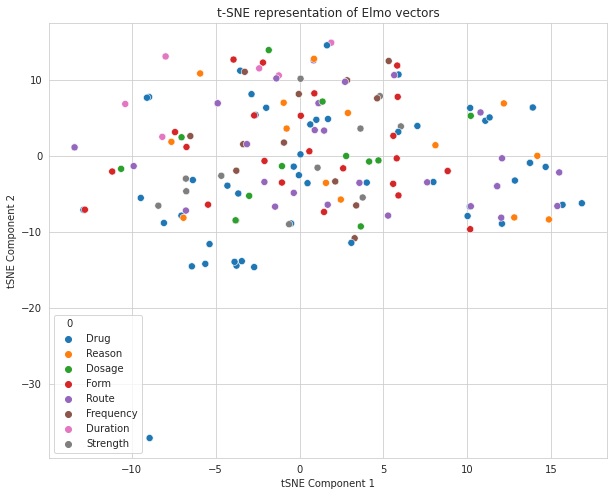

In [42]:
plot_elmo_embeddings(entity_name, entity_embeddings, point_size=50)